## Import Dependencies

In [17]:
import os
import numpy as np
import pandas as pd
import altair as alt
import pywt
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

### File Path and No. of Data Subcarriers

In [18]:
# NAME OF FILE AFTER CONVERTING TO REQUIRED FORMAT USING 'subcarrier.ipynb'
name = 'combined'
session = '2'
type = 'nLoS'
filepath = '../Data/subcarrier/'+f'{type}/'+f'{name}'+f'{session}'+'_subcarrier.csv'

#No. OF DATA SUBCARRIERS
SUBCARRIES_NUM = 55

### Read CSV File and Separate Amplitude and Phase Data

In [19]:
def read_csi_data_from_csv(path_to_csv):
    file = pd.read_csv(path_to_csv, header=None).values

    # CONVERT CSV TO DATAFRAME WITH FLOATING POINT VALUES
    data = pd.DataFrame(file).apply(pd.to_numeric, errors='coerce').values
    # CONVERT 'Nan' VALUES IN DATAFRAME TO 0.0
    data = np.nan_to_num(data)

    # data_len = data.shape[0]
    antenna_pair = 1
    # display(data_len)
    subcarries_num = SUBCARRIES_NUM
    amplitudes = data[:, :subcarries_num]
    amp_dat = pd.DataFrame(amplitudes)
    display(amp_dat)
    display(len(amp_dat.columns))
    phases = data[:, subcarries_num:subcarries_num*2]
    phase_dat = pd.DataFrame(phases)
    display(phase_dat)
    
    return amplitudes, phases

In [20]:
experiments_data = []
amplitudes, phases = read_csi_data_from_csv(filepath)
experiments_data.append([amplitudes, phases])
# display(experiments_data[0][0][0])

#EXPERIMENT_DATA[0][0] --> AMPLITUDES
#EXPERIMENT_DATA[0][0] --> PHASES

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,371.397361,360.998615,386.621262,342.344855,293.782232,288.923865,268.208874,315.279241,384.603692,395.747394,...,506.426698,473.178613,387.737024,372.649970,454.215808,445.701694,328.762832,375.150636,360.312364,282.235717
1,539.689726,580.883809,597.147385,564.428915,542.560596,471.020169,380.867431,277.200289,167.693172,68.425142,...,468.705665,564.490921,634.319320,669.932832,668.689016,633.411399,575.026956,518.703191,385.416658,287.800278
2,318.127333,473.761543,645.105418,727.825529,926.174929,1039.754298,1000.192981,1012.633201,989.062688,853.937351,...,431.522885,318.849494,358.235956,410.728621,481.394848,578.938684,692.446388,855.716074,940.172325,1027.654611
3,429.260993,340.895879,330.770313,424.189816,257.769277,326.193194,330.493570,332.356736,335.180548,323.871888,...,648.266920,679.094250,664.903752,351.454122,513.653580,541.117363,223.322637,544.177361,486.564487,617.668196
4,291.235300,421.816311,603.331584,754.856940,901.767154,1007.893348,1023.533097,1004.982089,952.447374,880.940974,...,474.684105,385.688994,408.270744,442.064475,501.022954,628.782951,740.326955,800.246212,925.792633,987.078518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170110,695.278362,590.177092,485.025773,304.198948,106.550458,112.800709,293.220054,495.550199,699.544137,848.005307,...,815.846186,752.811397,753.573487,672.592745,463.967671,305.137674,127.192767,224.075880,354.496827,418.294155
170111,1013.903348,841.799263,576.966204,377.561915,147.610975,299.793262,587.777169,743.962365,973.362214,1131.629356,...,1144.407707,925.859601,837.541641,852.150221,614.065957,384.439852,253.712436,158.069605,441.403444,743.829281
170112,600.967553,531.459312,683.029282,677.504982,948.717555,1127.782337,1129.973451,1155.345836,1119.500782,1134.094352,...,573.927696,545.309087,478.831912,431.653796,465.430983,482.001037,457.088613,516.531703,755.921954,797.988722
170113,655.790363,595.614808,397.775062,196.389918,61.073726,127.863208,246.008130,424.699894,491.146618,644.237534,...,807.993193,758.093002,652.289813,565.529840,383.975260,235.715931,21.954498,148.553021,391.841805,519.293751


55

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2.755086,1.301629,-0.234941,-1.687905,2.942862,1.713183,0.302885,-1.248043,-2.677945,2.241591,...,-0.653769,-1.598274,-2.550729,1.979212,0.520785,-0.817134,-2.110694,2.401447,0.885653,-0.210598
1,-0.760502,-1.924127,-3.079592,2.021766,0.902964,-0.253217,-1.380610,-2.499535,2.750013,2.040980,...,-2.972235,2.141602,0.974923,-0.196810,-1.353749,-2.504091,2.625035,1.489736,0.357860,-0.778027
2,-0.028294,-0.785398,-1.696689,-2.653979,2.478656,1.323019,0.196219,-0.935393,-2.057958,3.094734,...,-2.721486,2.769240,2.024457,1.162708,0.363147,-0.677708,-1.670609,-2.656516,2.463197,1.318029
3,-1.468114,-2.816132,2.298443,0.346354,-0.340153,-2.115422,2.433295,0.719396,-0.793837,-1.940409,...,2.536048,1.132835,-0.543773,-1.777120,-2.800140,1.463404,-0.053760,-0.867352,-2.412902,2.243767
4,-2.651837,-1.929290,-1.603952,-1.340919,-1.198527,-0.985270,-0.872555,-0.677538,-0.504039,-0.401165,...,2.909899,-2.969624,-2.392574,-1.929037,-1.506883,-1.105726,-0.882976,-0.654248,-0.418224,-0.274960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170110,1.224483,0.262240,-0.633192,-1.606965,-2.080630,-0.923749,-1.197256,-2.078679,-2.985139,2.335347,...,1.038575,0.086451,-0.748795,-1.658629,-2.377533,-2.883101,-3.086530,-2.663974,3.022836,2.061176
170111,1.027670,0.320248,-0.374391,-1.052636,-2.485897,1.314491,0.152003,-0.570853,-1.254244,-2.016659,...,2.494422,1.788528,1.390729,0.742236,0.014657,-0.502045,-1.073652,0.197396,0.385555,-0.446211
170112,2.870379,2.466852,1.993183,1.455412,0.753344,0.162087,-0.524635,-1.140444,-1.796926,-2.549433,...,-0.081984,-0.694503,-1.461984,-1.896210,-2.274063,-2.859873,-3.121902,2.677945,2.139352,1.484221
170113,-2.238393,-2.602037,-2.887468,2.831114,-3.092452,-0.579326,-1.088969,-1.316109,-1.595231,-1.987917,...,-1.042900,-1.292859,-1.633693,-1.872415,-2.184083,-2.446311,-1.046001,-0.813962,-0.443103,-0.752712


### Function to preprocess Phase data

In [21]:
# https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/sys031fp.pdf
# Based on https://github.com/ermongroup/Wifi_Activity_Recognition/.../phase_calibration.m
def calibrate_single_phase(phases):
    phases = np.array(phases)
    difference = 0

    calibrated_phase, calibrated_phase_final = np.zeros_like(phases), np.zeros_like(phases)   
    calibrated_phase[0] = phases[0]
    
    phases_len = phases.shape[0]
    
    for i in range(1, phases_len):
        temp = phases[i]- phases[i - 1]
        
        if abs(temp) > np.pi:
            difference = difference + 1*np.sign(temp)
            
        calibrated_phase[i] = phases[i] - difference * 2 * np.pi
        
    k = (calibrated_phase[-1] - calibrated_phase[0]) / (phases_len - 1)
    b = np.mean(calibrated_phase)
    
    for i in range(phases_len):
        calibrated_phase_final[i] = calibrated_phase[i] - k * i - b
        
    return calibrated_phase_final


def calibrate_phase(phases):
    calibated_phases = np.zeros_like(phases)
    
    for i in range(phases.shape[0]):
        calibated_phases[i] = calibrate_single_phase(np.unwrap(phases[i]))
    
    return calibated_phases

def calibrate_amplitude(amplitudes, rssi=1): # Basic statistical normalization
    amplitudes = np.array(amplitudes)    
    return ((amplitudes - np.min(amplitudes)) / (np.max(amplitudes) - np.min(amplitudes))) * rssi

### Functions for Preprocessing (Using Hampel & Denoising)

In [22]:
def hampel(vals_orig, k=3, t0=123, outliers_return=False):
    vals = pd.Series(vals_orig.copy())

    #HAMPEL FILTER
    L= 1.4826
    
    rolling_median=vals.rolling(k).median()
    difference=np.abs(rolling_median-vals)
    median_abs_deviation=difference.rolling(k).median()
    threshold= t0 *L * median_abs_deviation
    outlier_idx=difference>threshold
    vals[outlier_idx]=rolling_median
    
    if outliers_return:
        return vals, outlier_idx

    return vals

def denoise(vals, th=0.19):
    threshold = th # THRESHOLD OF FILTERING

    data = vals.copy()

    w = pywt.Wavelet('sym5')
    maxlev = pywt.dwt_max_level(data.shape[0], w.dec_len)
    
    # Decompose into wavelet components, to the level selected:
    coeffs = pywt.wavedec(data, 'sym5', level=maxlev)
    
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))

    datarec = pywt.waverec(coeffs, 'sym5')
    
    return datarec

def filter_amplitude_all_subcarriers(amplitudes):
    data_len = amplitudes.shape[0]
    
    res = np.zeros_like(amplitudes)

    for i in range(amplitudes.shape[1]):
        res[:data_len, i] = denoise(hampel(amplitudes[:, i]))[:data_len]
        
    return res

def hampel_all_subcarriers(amplitudes, k=3, t0=123):
    data_len = amplitudes.shape[0]
    
    res = np.zeros_like(amplitudes)
    outliers = []

    for i in range(amplitudes.shape[1]):
        res[:data_len, i], out = hampel(amplitudes[:, i], k, t0, outliers_return=True)[:data_len]
        outliers.append(out)
        
    return res, outliers

def denoise_all_subcarriers(amplitudes, th=0.19):
    data_len = amplitudes.shape[0]
    
    res = np.zeros_like(amplitudes)
    
    for i in range(amplitudes.shape[1]):
        res[:data_len, i] = denoise(amplitudes[:, i], th)[:data_len]
        
    return res

## Plot of Amplitude Data All Subcarrier With and Without Filtering

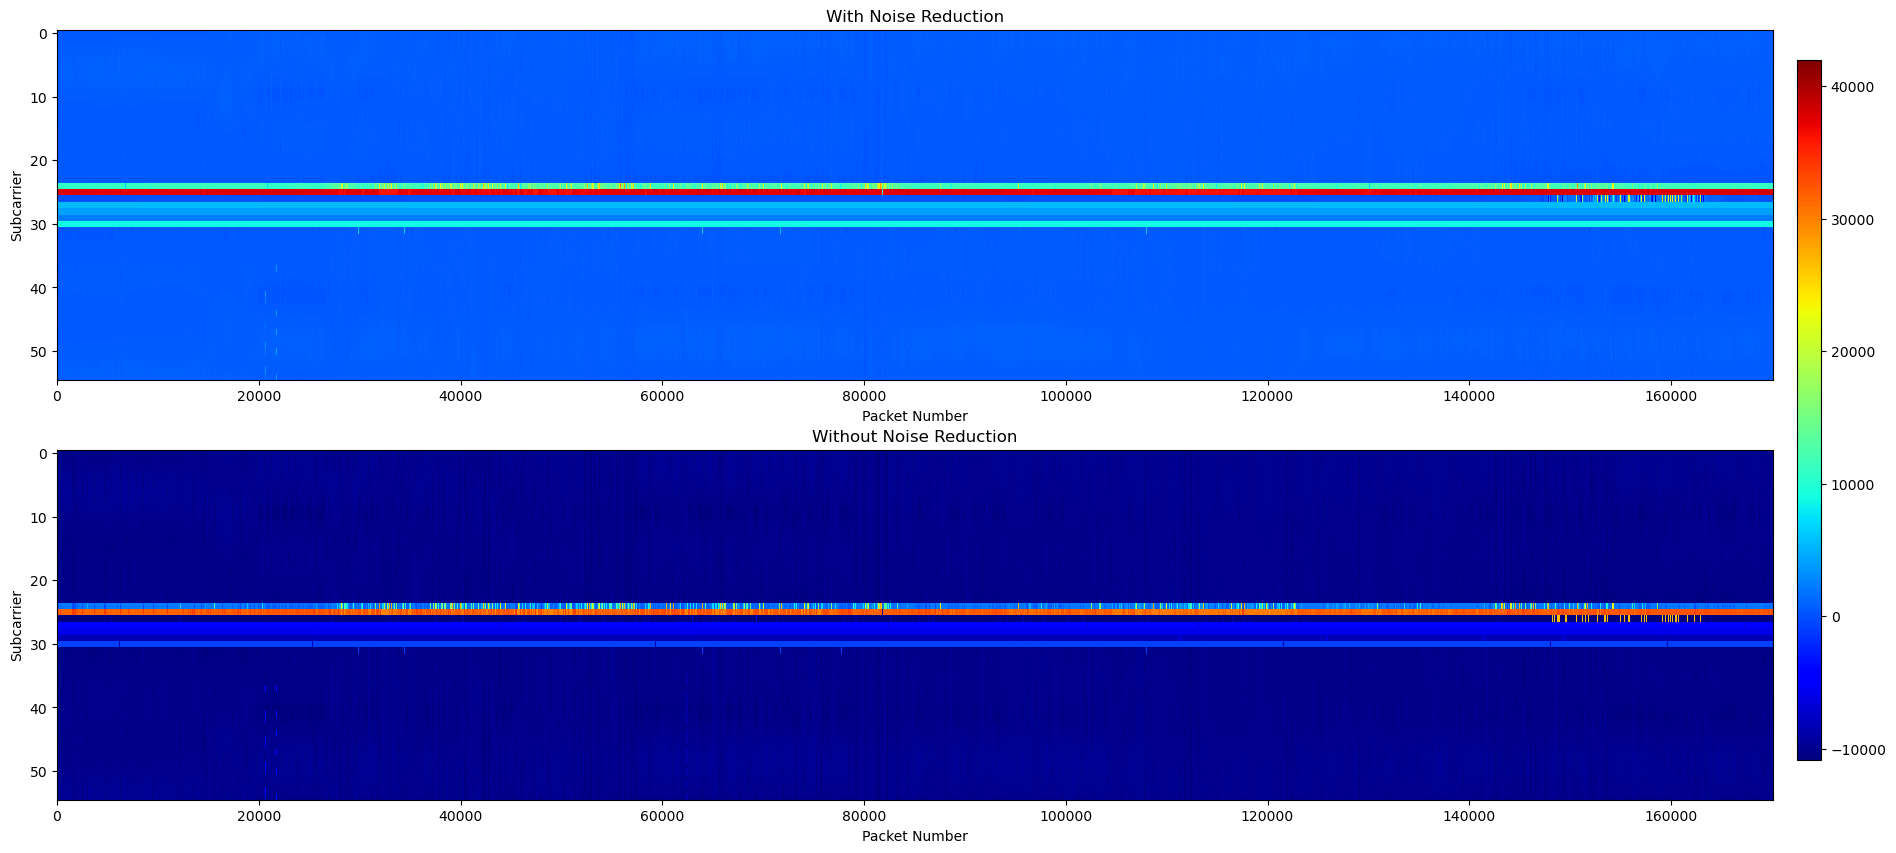

In [23]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

#PLOT AMPLITUDE AFTER NOISE REDUCTION
fig = plt.figure(figsize = (24,10))
ax = fig.add_subplot(211)
im = plt.imshow(filter_amplitude_all_subcarriers(experiments_data[0][0][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM]).T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax.set_title("With Noise Reduction")

#PLOT AMPLITUDE WITHOUT NOISE REDUCTION
ax1 = fig.add_subplot(212)
im1 = plt.imshow((experiments_data[0][0][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM]).T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax1.set_title("Without Noise Reduction")

ax.set_ylabel('Subcarrier')
ax.set_xlabel('Packet Number')
ax1.set_ylabel('Subcarrier')
ax1.set_xlabel('Packet Number')

fig.subplots_adjust(right=0.84)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

## Amplitude Plot for Single Subcarrier with and without filtering

### Without Filtering

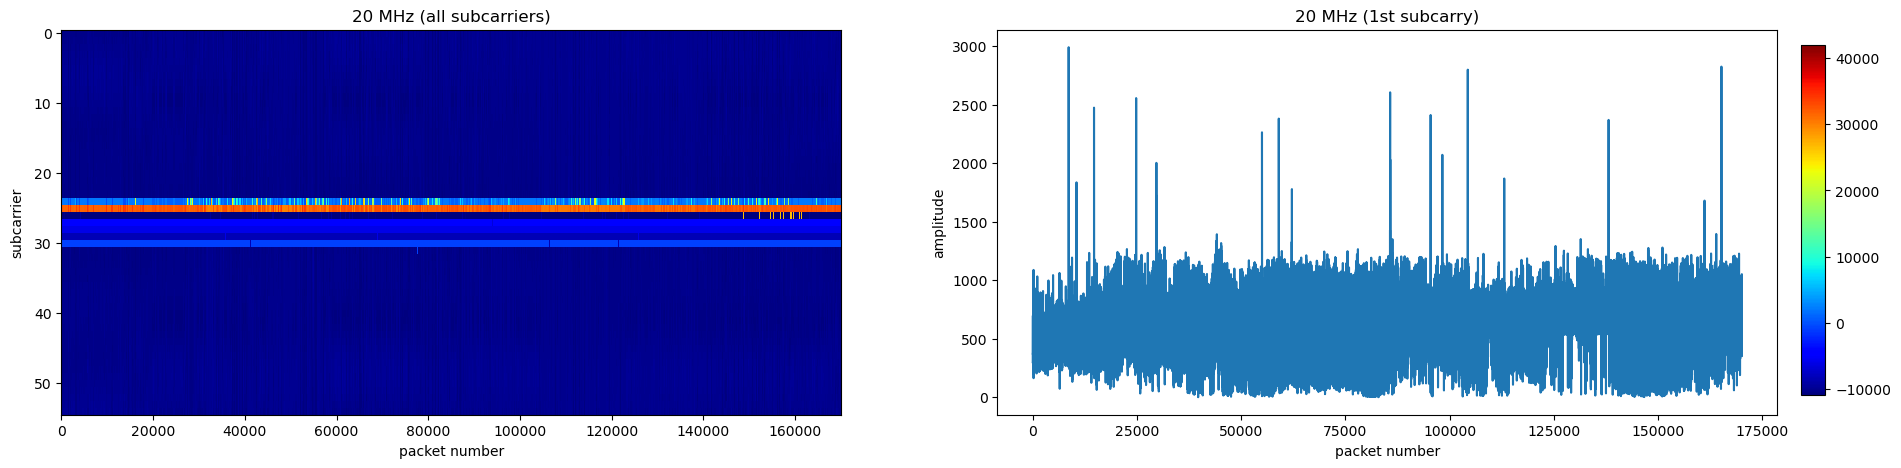

In [24]:
fig = plt.figure(figsize = (24,5))
ax = fig.add_subplot(111)

ax1 = fig.add_subplot(121)
plt.imshow((experiments_data[0][0][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM]).T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax1.set_title("20 MHz (all subcarriers)")

ax3 = fig.add_subplot(122)
plt.plot((experiments_data[0][0][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM])[:, 0])
ax3.set_title("20 MHz (1st subcarry)")

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax.set_ylabel('subcarrier')
ax1.set_xlabel('packet number')
ax3.set_ylabel('amplitude')
ax3.set_xlabel('packet number')

fig.subplots_adjust(right=0.84)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

### With Filtering

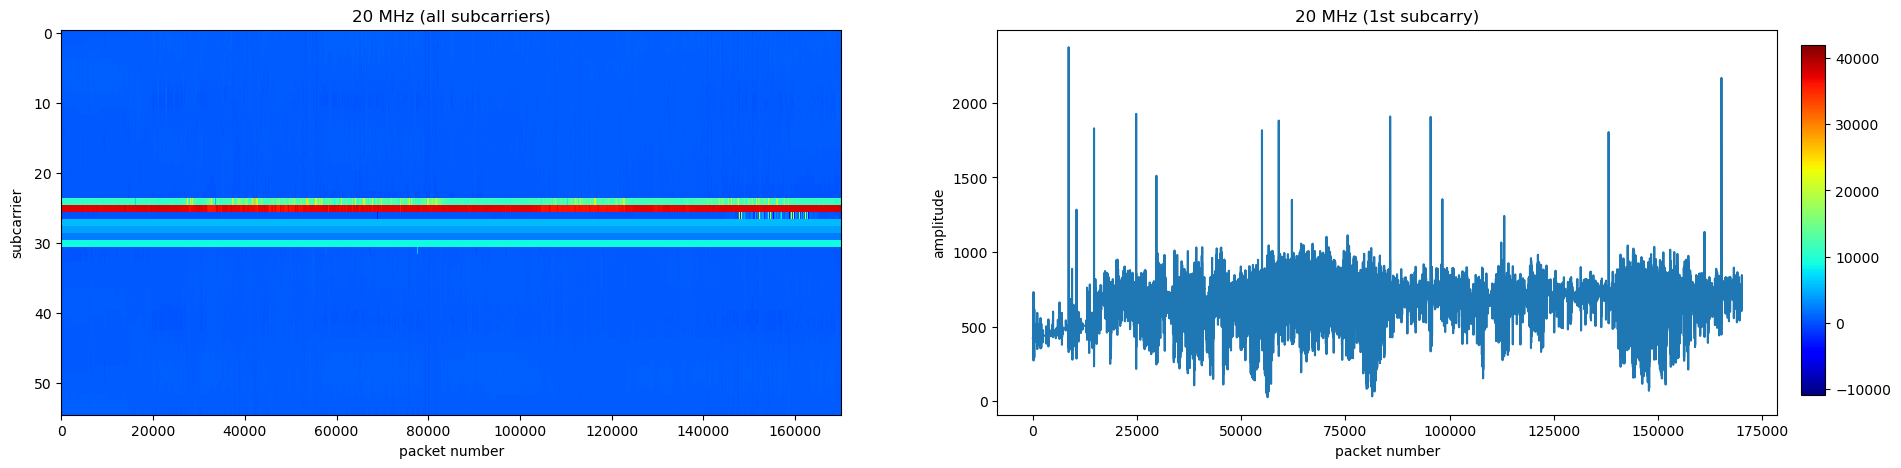

In [25]:
fig = plt.figure(figsize = (24, 5))
ax = fig.add_subplot(111)

ax1 = fig.add_subplot(121)
plt.imshow(filter_amplitude_all_subcarriers(experiments_data[0][0][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM]).T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax1.set_title("20 MHz (all subcarriers)")

ax3 = fig.add_subplot(122)
plt.plot(filter_amplitude_all_subcarriers(experiments_data[0][0][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM])[:, 0])
ax3.set_title("20 MHz (1st subcarry)")

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax.set_ylabel('subcarrier')
ax1.set_xlabel('packet number')
ax3.set_ylabel('amplitude')
ax3.set_xlabel('packet number')


fig.subplots_adjust(right=0.84)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

## Preprocessing Visualization

### 1. Phase Sanitization

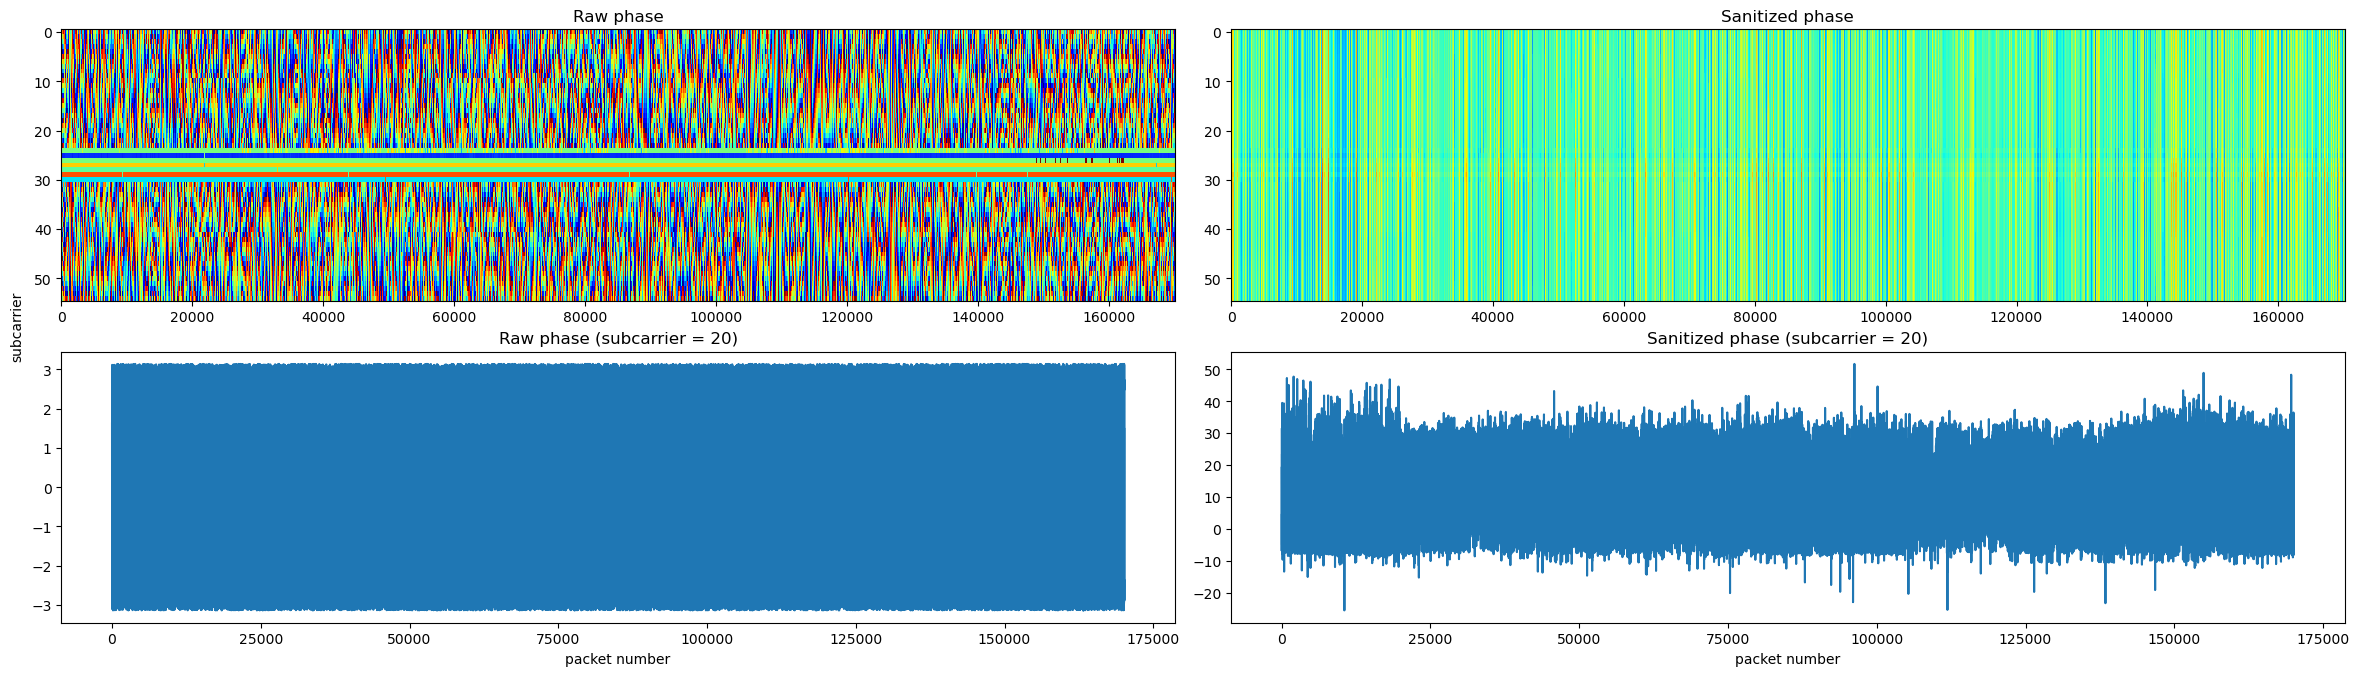

In [26]:
fig = plt.figure(figsize = (24, 7))
ax = fig.add_subplot(111)

ax1 = fig.add_subplot(221)
im = plt.imshow((experiments_data[0][1][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM]).T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax1.set_title("Raw phase")

ax2 = fig.add_subplot(222)
im = plt.imshow(calibrate_phase(experiments_data[0][1][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM]).T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax2.set_title("Sanitized phase")

ax3 = fig.add_subplot(223)
plt.plot((experiments_data[0][1][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM])[:, 20])
ax3.set_title("Raw phase (subcarrier = 20)")

ax4 = fig.add_subplot(224)
plt.plot(calibrate_phase(experiments_data[0][1][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM])[:, 20])
ax4.set_title("Sanitized phase (subcarrier = 20)")

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax.set_ylabel('subcarrier')
ax3.set_xlabel('packet number')
ax4.set_xlabel('packet number')

fig.tight_layout(pad=0.5)

plt.show()

### 2. Hampler Identifier Identification

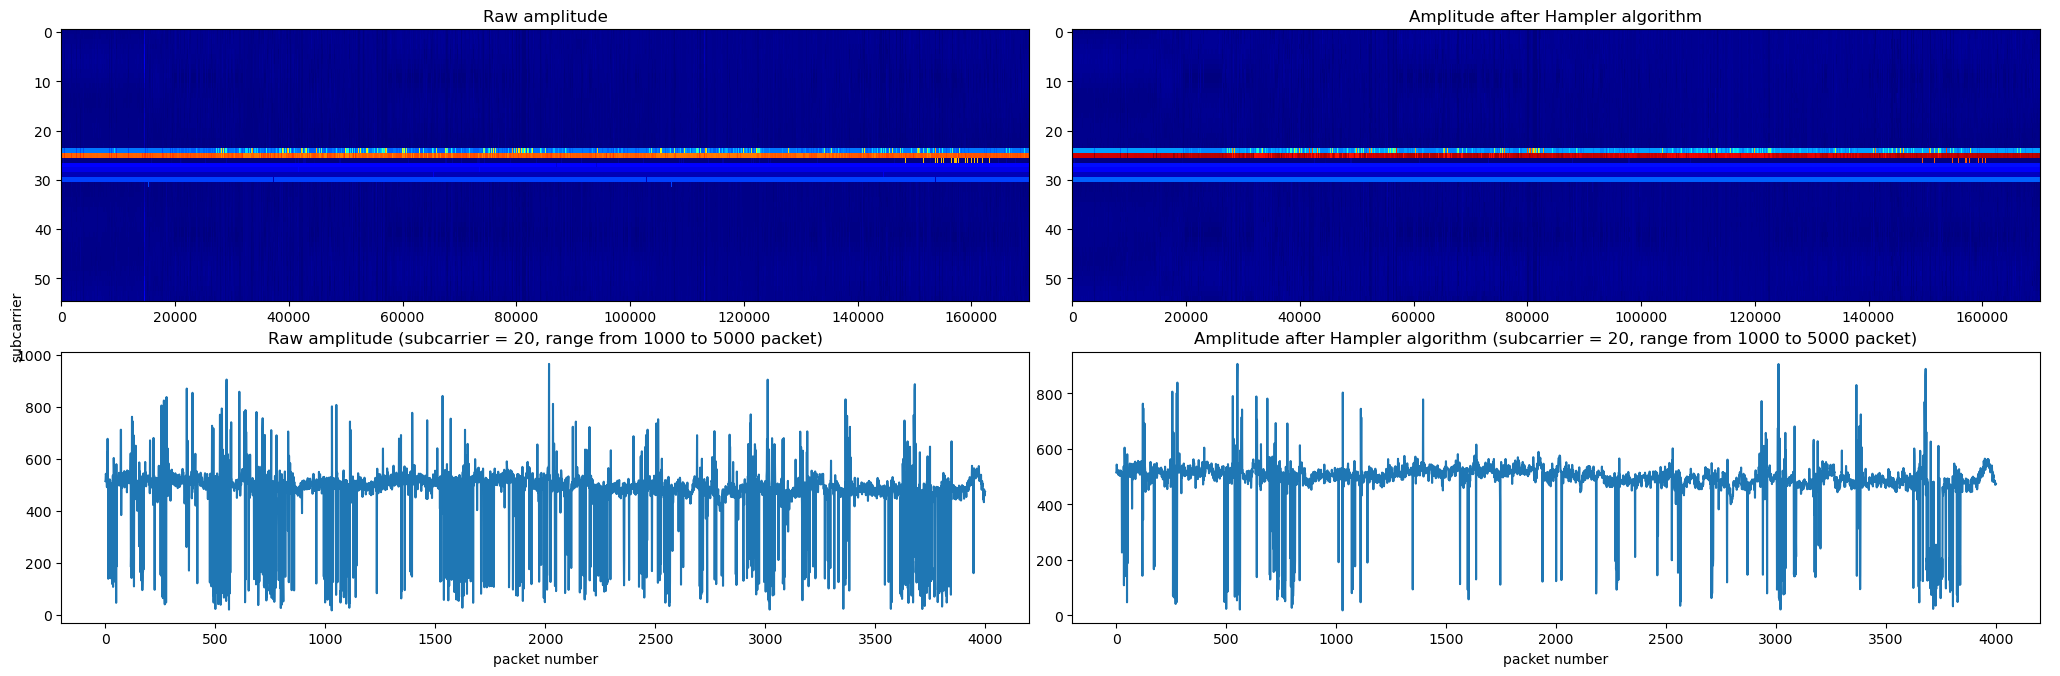

In [27]:
fig = plt.figure(figsize = (21, 7))
ax = fig.add_subplot(111)

amplitude = experiments_data[0][0][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM]
h_amplitude, outliers = hampel_all_subcarriers(amplitude, k=5, t0=2)

ax1 = fig.add_subplot(221)
im = plt.imshow((amplitude).T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax1.set_title("Raw amplitude")

ax2 = fig.add_subplot(222)
im = plt.imshow(h_amplitude.T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax2.set_title("Amplitude after Hampler algorithm")

# PLOT FOR 1000 TO 5000 PACKETS, 20TH SUBCARRIER
ax3 = fig.add_subplot(223)
plt.plot((amplitude)[1000:5000, 20])
ax3.set_title("Raw amplitude (subcarrier = 20, range from 1000 to 5000 packet)")

ax4 = fig.add_subplot(224)
plt.plot(h_amplitude[1000:5000, 20])
ax4.set_title("Amplitude after Hampler algorithm (subcarrier = 20, range from 1000 to 5000 packet)")

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax.set_ylabel('subcarrier')
ax3.set_xlabel('packet number')
ax4.set_xlabel('packet number')

fig.tight_layout(pad=0.5)
plt.show()

In [28]:
# NO. OF OUTLIERS
(outliers[20].to_numpy().sum())

31660

### 3. Denoising

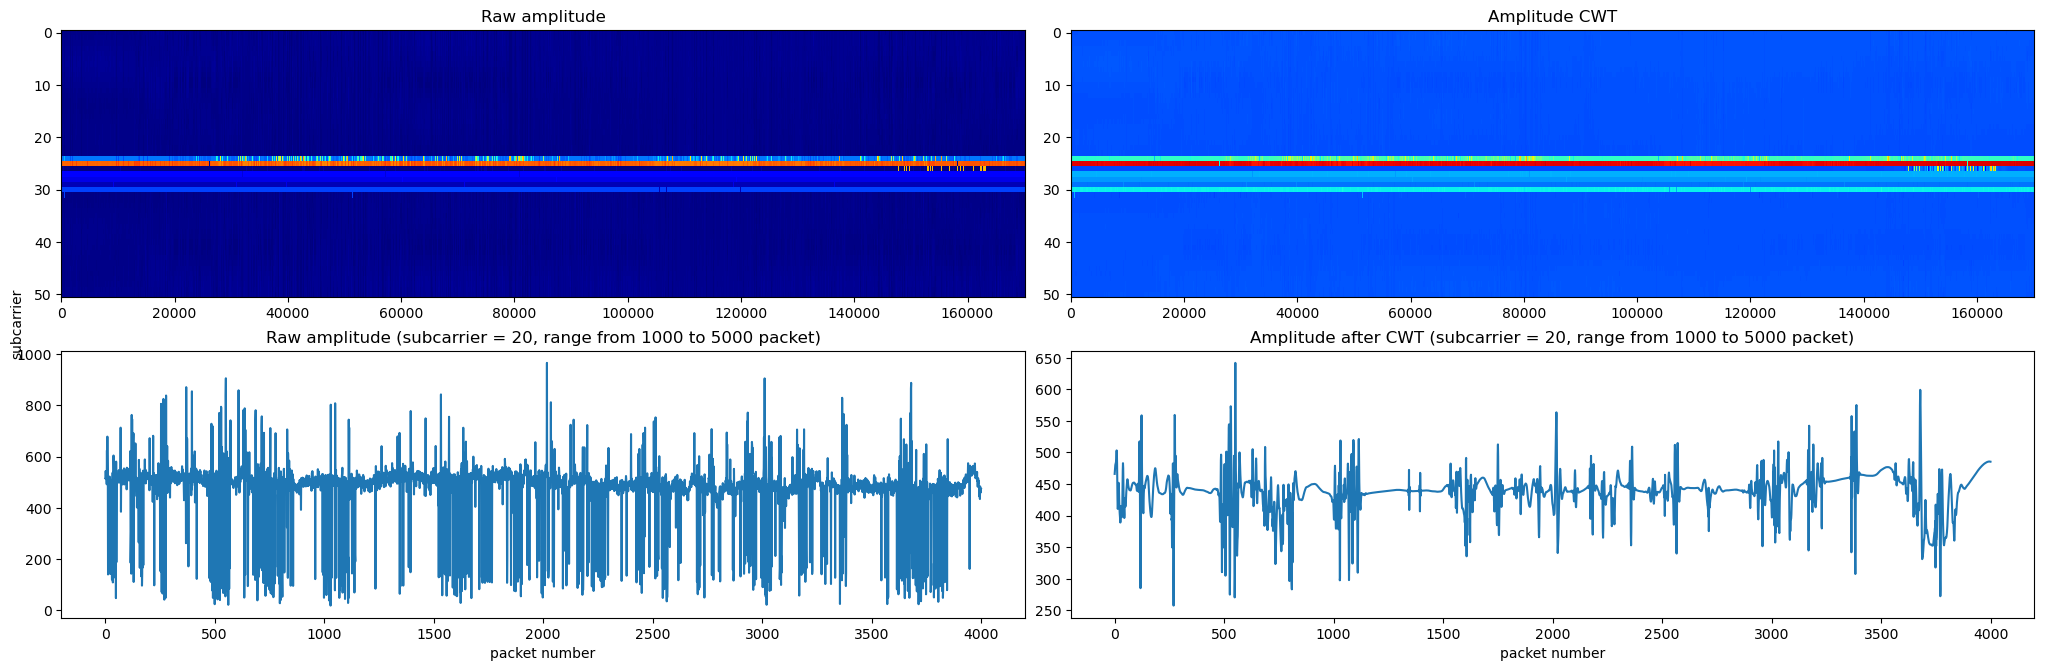

In [29]:
# TAKING AMPLITUDE FOR 52 SUBCARRIERS MANUALLY
dataset_amp = experiments_data[0][0][:, 0:51]
dataset_amp.shape

fig = plt.figure(figsize = (21, 7))
ax = fig.add_subplot(111)

amplitude = dataset_amp[:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM]
denoise_amplitude = denoise_all_subcarriers(amplitude, th=0.2)

ax1 = fig.add_subplot(221)
im = plt.imshow((amplitude).T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax1.set_title("Raw amplitude")

ax2 = fig.add_subplot(222)
im = plt.imshow(denoise_amplitude.T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax2.set_title("Amplitude CWT")

# PLOT FOR 1000 TO 5000 PACKETS, 20TH SUBCARRIER

ax3 = fig.add_subplot(223)
plt.plot((amplitude)[1000:5000, 20])
ax3.set_title("Raw amplitude (subcarrier = 20, range from 1000 to 5000 packet)")

ax4 = fig.add_subplot(224)
plt.plot(denoise_amplitude[1000:5000, 20])
ax4.set_title("Amplitude after CWT (subcarrier = 20, range from 1000 to 5000 packet)")

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax.set_ylabel('subcarrier')
ax3.set_xlabel('packet number')
ax4.set_xlabel('packet number')

fig.tight_layout(pad=0.7)
plt.show()

## Amplitude Preprocessing

In [30]:
result1 = filter_amplitude_all_subcarriers(experiments_data[0][0][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM])

df_result1 = pd.DataFrame(result1)

display(df_result1)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,421.984220,463.965526,528.904664,553.555681,525.480113,522.907322,453.316641,455.308051,464.058298,422.564642,...,503.935497,492.353297,496.029144,472.331975,539.209211,577.439502,492.675606,580.465336,539.060634,533.370591
1,421.952349,464.102104,529.082292,551.032323,526.249059,531.167758,466.308045,466.193619,467.927357,407.934551,...,503.810677,492.215742,495.917818,472.313600,539.205355,577.457154,495.988302,584.318967,545.826250,543.076899
2,421.915466,464.241222,529.263044,551.651758,531.754794,540.382562,485.141513,481.349996,492.570314,461.980603,...,503.683377,492.074294,495.803254,472.292395,539.200669,577.475081,499.892981,588.854445,553.453325,554.350959
3,421.871614,464.383616,529.447856,542.776051,525.257670,523.643570,475.825600,493.243017,475.797072,395.879164,...,503.552779,491.927546,495.684280,472.267212,539.194830,577.493412,504.673781,594.399748,562.296613,567.902642
4,421.820800,464.529282,529.636720,599.861139,632.596790,721.077721,680.304698,572.619453,563.382650,586.007312,...,503.418889,491.775510,495.560906,472.238063,539.187839,577.512143,510.333253,600.957642,572.358394,583.738579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170110,762.773629,754.750965,653.154661,559.055119,390.916776,467.076206,585.086378,661.493001,677.112253,734.428078,...,733.108806,706.628993,710.195838,698.788163,653.464020,525.871485,249.005911,432.876710,602.760509,661.223509
170111,755.764274,735.413404,654.527413,543.282804,358.907723,478.188824,583.187132,656.327008,691.995575,832.816420,...,734.107371,707.089712,710.619333,705.173687,665.044134,560.207174,304.136048,462.965810,615.305280,660.498683
170112,721.230691,625.624378,588.229004,400.532182,206.650979,826.043728,726.939001,657.415503,654.719641,803.958461,...,735.237966,707.333890,710.744601,710.452090,672.482659,585.152530,372.995260,484.952309,624.457358,659.836231
170113,724.932899,635.828025,622.655198,433.786130,271.100873,455.944967,555.349551,658.192168,638.156317,723.748268,...,735.855003,707.359824,710.593876,713.988884,677.187109,600.223151,421.598226,498.413002,630.729168,659.125939


## Phase Preprocessing

In [31]:
result = calibrate_phase(experiments_data[0][1][:, 0*SUBCARRIES_NUM:1*SUBCARRIES_NUM])

df_result = pd.DataFrame(result)

display(df_result)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,33.109489,32.874504,32.556407,32.321916,31.887971,31.876765,31.684940,31.352485,31.141056,30.995879,...,34.266432,34.540401,34.806419,34.271647,34.031693,33.912247,33.837160,33.284588,32.987267,33.109489
1,24.831812,24.599354,24.375056,24.124395,23.936760,23.711745,23.515520,23.327762,23.225290,23.447424,...,26.823474,26.585292,26.349780,26.109214,25.883441,25.664267,25.441374,25.237242,25.036532,24.831812
2,24.581923,24.730730,24.725349,24.673970,24.429329,24.179603,23.958713,23.733012,23.516357,23.291774,...,24.955585,25.069036,25.230164,25.274325,25.380675,25.245730,25.158740,25.078743,24.821181,24.581923
3,29.589016,29.335813,29.262016,28.404742,28.813048,28.132594,27.492940,26.873855,26.455437,26.403679,...,32.594338,32.285939,31.704146,31.565613,31.637407,30.712581,30.290231,30.571453,30.120717,29.589016
4,-4.113860,-3.551684,-3.386717,-3.284056,-3.302036,-3.249151,-3.296807,-3.262161,-3.249034,-3.306532,...,-5.768843,-5.525552,-5.108873,-4.805708,-4.543926,-4.303140,-4.240761,-4.172405,-4.096753,-4.113860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170110,15.249791,14.853830,14.524680,14.117190,14.209807,15.932970,16.225745,15.910604,15.570426,15.174009,...,15.413837,15.027995,14.759032,14.415479,14.262858,14.323571,14.686425,15.675263,15.645170,15.249791
170111,19.291171,19.192819,19.107250,19.038076,18.213885,16.340159,15.786741,15.672956,15.598635,15.445290,...,16.750169,16.653346,16.864617,16.825194,16.706686,16.799054,16.836519,18.716636,19.513866,19.291171
170112,16.448655,16.652574,16.786351,16.856026,16.761404,16.777594,16.698318,16.689954,16.640918,16.495858,...,15.698621,15.693548,15.533513,15.706733,15.936327,15.957962,16.303380,16.427487,16.496340,16.448655
170113,2.842132,2.567331,2.370743,1.894982,2.343444,4.945413,4.524613,4.386315,4.196035,3.892192,...,1.752361,1.591244,1.339253,1.189373,0.966549,0.793163,2.282316,2.603198,3.062900,2.842132


# Combined Preprocessed Data

In [32]:
df_row_concat = pd.concat([df_result1, df_result], axis=1, ignore_index=True)

display(df_row_concat)

save_path = '../Data/Wireless Eye Data/Preprocessed Data/'+f'{type}/'+f'{name}'+f'{session}'+'_preprocessed.csv'

df_row_concat.to_csv(save_path, index=False, header=False)

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,421.984220,463.965526,528.904664,553.555681,525.480113,522.907322,453.316641,455.308051,464.058298,422.564642,...,34.266432,34.540401,34.806419,34.271647,34.031693,33.912247,33.837160,33.284588,32.987267,33.109489
1,421.952349,464.102104,529.082292,551.032323,526.249059,531.167758,466.308045,466.193619,467.927357,407.934551,...,26.823474,26.585292,26.349780,26.109214,25.883441,25.664267,25.441374,25.237242,25.036532,24.831812
2,421.915466,464.241222,529.263044,551.651758,531.754794,540.382562,485.141513,481.349996,492.570314,461.980603,...,24.955585,25.069036,25.230164,25.274325,25.380675,25.245730,25.158740,25.078743,24.821181,24.581923
3,421.871614,464.383616,529.447856,542.776051,525.257670,523.643570,475.825600,493.243017,475.797072,395.879164,...,32.594338,32.285939,31.704146,31.565613,31.637407,30.712581,30.290231,30.571453,30.120717,29.589016
4,421.820800,464.529282,529.636720,599.861139,632.596790,721.077721,680.304698,572.619453,563.382650,586.007312,...,-5.768843,-5.525552,-5.108873,-4.805708,-4.543926,-4.303140,-4.240761,-4.172405,-4.096753,-4.113860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170110,762.773629,754.750965,653.154661,559.055119,390.916776,467.076206,585.086378,661.493001,677.112253,734.428078,...,15.413837,15.027995,14.759032,14.415479,14.262858,14.323571,14.686425,15.675263,15.645170,15.249791
170111,755.764274,735.413404,654.527413,543.282804,358.907723,478.188824,583.187132,656.327008,691.995575,832.816420,...,16.750169,16.653346,16.864617,16.825194,16.706686,16.799054,16.836519,18.716636,19.513866,19.291171
170112,721.230691,625.624378,588.229004,400.532182,206.650979,826.043728,726.939001,657.415503,654.719641,803.958461,...,15.698621,15.693548,15.533513,15.706733,15.936327,15.957962,16.303380,16.427487,16.496340,16.448655
170113,724.932899,635.828025,622.655198,433.786130,271.100873,455.944967,555.349551,658.192168,638.156317,723.748268,...,1.752361,1.591244,1.339253,1.189373,0.966549,0.793163,2.282316,2.603198,3.062900,2.842132
